In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcardfraud/creditcard.csv


In [6]:
import pandas as pd 
df = pd.read_csv("/kaggle/input/creditcardfraud/creditcard.csv")


In [7]:
df.head(20)
#df.shape
#df[df.Class==0].shape

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features = [f'V{i}' for i in range(1, 29)]
features.append("Amount")
dfs = pd.DataFrame(scaler.fit_transform(df[features]), columns=features)

In [9]:
%matplotlib inline

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

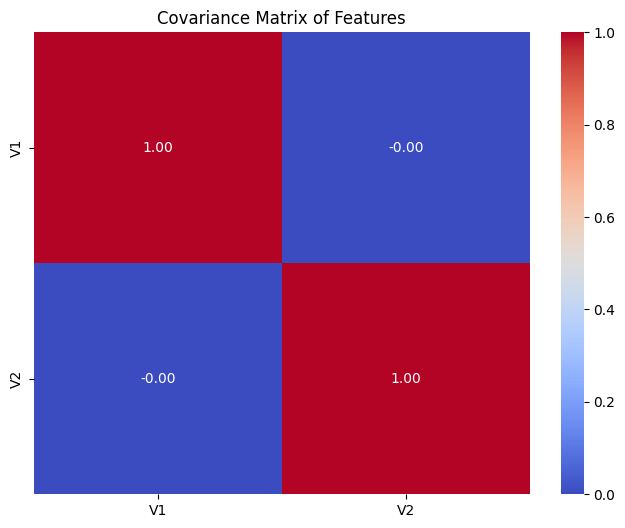

In [11]:
# Calculate the covariance matrix
covariance_matrix = dfs[['V1', 'V2']].cov()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(covariance_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Covariance Matrix of Features')
plt.show()

In [12]:
from sklearn.model_selection import train_test_split
x = np.array(dfs)
y = np.array(df[["Class"]])

In [13]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, 
                                                    test_size=0.33, 
                                                    random_state=42)

In [14]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(xtrain, ytrain)

<ipython-input-14-781c8d526be2>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(xtrain, ytrain)


RandomForestClassifier()

In [15]:
import pickle
import joblib 

filename_pickle = 'random_forest_model.pkl'
with open(filename_pickle, 'wb') as file:
    pickle.dump(model, file)
print(f"Model saved to {filename_pickle} using pickle")

Model saved to random_forest_model.pkl using pickle


In [17]:
Yhat = model.predict(xtest)

In [18]:
from sklearn.metrics import accuracy_score

In [19]:
accuracy = accuracy_score(ytest, Yhat)
print("Accuracy:", accuracy)

Accuracy: 0.9995956887654676
